In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Generate target data
x = np.arange(0,20,1)
y = 1 + x**2
X = x.reshape(-1, 1)

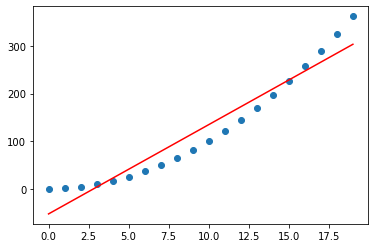

In [15]:
def predict(X, w, b):
    return np.dot(X,w)+b

def computeCost(X, w, b, y):
    n = X.shape[0]
    cost = 0
    for i in range(n):
        cost += (y[i] - predict(X[i], w, b))**2

    return cost/(2*n)

def compueteGradient(X,y,w,b):
    n = X.shape[0]
    m = X.shape[1]
    gradient_W = np.zeros(m)
    gradient_b = 0
    for i in range(n):
        for j in range(m):
            gradient_W[j] += (predict(X[i,:],w,b)-y[i])*X[i,j]
        gradient_b += (predict(X[i,:],w,b)-y[i])
    return gradient_W/n, gradient_b/n

def gradientDescent(X, y, w0, b0, alpha, numIters):
    w = w0
    b = b0
    costArray = np.zeros(numIters)

    for i in range(numIters):
        w = w - alpha * compueteGradient(X,y,w,b)[0]
        b = b - alpha * compueteGradient(X,y,w,b)[1]
        costArray[i] = computeCost(X,w,b,y)

    return w, b, costArray

def zScoreNormalization(X):
    return (X- np.mean(X))/np.std(X)

# Comparing the Linear regression's results with the target data
w, b, costArray = gradientDescent(X, y, np.zeros(X.shape[1]), 0, 0.01, 1000)
plt.scatter(x,y)
plt.plot(x, predict(X,w,b), "r")
plt.show()

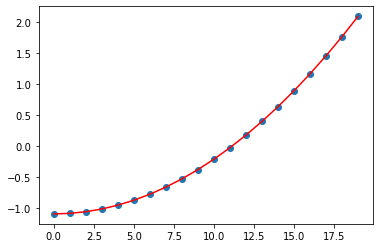

In [30]:
x = np.arange(0, 20, 1)
y = 1 + x**2

# feature engineering
X = x**2
X = X.reshape(-1, 1)
X = zScoreNormalization(X)
y = zScoreNormalization(y)
w, b, costArray = gradientDescent(X, y, np.zeros(X.shape[1]), 0, 0.01, 1000)

plt.scatter(x,y)
plt.plot(x, predict(X,w,b), "r")
plt.show()